# Longitude, Latitude, Tilt and Azimuth Estimation Example

Bennet Meyers, Alejandro Londono

7/25/2021

This notebook demonstrates the usage of the `ConfigurationEstimator` class to estimate latitude, longitude, tilt and azimuth from field data. NIST provides data from a collection of fully instrumented and documented arrays installed at their Maryland campus. These arrays have known latitude, longitude, tilt, and azimuth parameters. The data is publicly available [here](https://doi.org/10.18434/M3S67G), and documentation of the systems is provided [here](http://dx.doi.org/10.6028/NIST.TN.1896). In preparation for this work, we downloaded the available data, which is provided in daily CSV files cover a time span of 4 years, separated by system (ground, canopy, roof, and the two meteorological stations). We extracted the power and irradiance columns from these 6937 individual CSV files, and combined them to generate a single table spanning four years. The resulting `pickle` file is about 1.1GB in size, and is available from [Bennet's personal OneDrive](https://stanford.zoom.us/j/97624690820?pwd=cE0yZHpua1dHaHJ3T2xGa3pwOFlLdz09).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Standard Imports
import pandas as pd
# from geopy.distance import great_circle
from glob import glob
from time import time
# Solar Data Tools imports
from solardatatools import DataHandler
# pv-system-profiler imports
import sys
sys.path.append('..')
sys.path.append('../../Documents/github/pv-system-profiler')
from pvsystemprofiler.estimator import ConfigurationEstimator

# Configuration information from the published documentation:

In [3]:
ground_system_configuration = {
    'longitude': -77.2141,
    'latitude': 39.1319,
    'tilt': 20,
    'azimuth': 0,
}

# Load in 4-year data file, derived from NIST CSV files.

In [4]:
try:
    df = pd.read_pickle('data/NIST_all_power_current_and_irradiance.pkl')
except FileNotFoundError:
    print('Please download example data file to working directory')

# Utilize standard `solar-data-tools` preprocessing pipeline.

## Using AC power signal

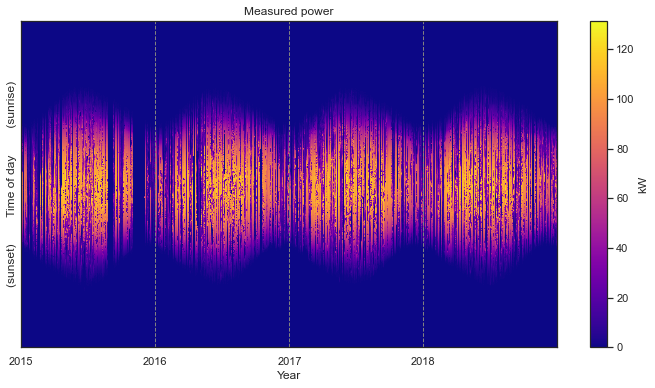

In [5]:
dh_dc_current = DataHandler(df)
dh_dc_current.run_pipeline(power_col= ('ground', 'ShuntCurrent_A_Avg_4'), verbose=False)
dh_dc_current.plot_heatmap(matrix='filled');

# Initialize estimator class with the data handler instance and timezone information.

In [6]:
est = ConfigurationEstimator(dh_dc_current, gmt_offset=-5)

# Estimate longitude using default keyboard arguments:

In [7]:
est.estimate_longitude()

m1  = 'Real Longitude:       {:.2f}\n'.format(ground_system_configuration['longitude'])
m1 += 'Estimated Longitude:  {:.2f}\n'.format(est.longitude)
m1 += 'error:                {:.2f}'.format(ground_system_configuration['longitude'] - est.longitude)
print(m1)

Real Longitude:       -77.21
Estimated Longitude:  -77.81
error:                0.60


# Estimate latitude using default keyboard arguments

In [8]:
est.estimate_latitude()

m1  = 'Real Latitude:        {:.2f}\n'.format(ground_system_configuration['latitude'])
m1 += 'Estimated  Latitude:  {:.2f}\n'.format(est.latitude)
m1 += 'error:                {:.2f}'.format(ground_system_configuration['latitude'] - est.latitude)
print(m1)

Real Latitude:        39.13
Estimated  Latitude:  43.18
error:                -4.05


# Estimate tilt and azimuth with known values of longitude and latitude 

In [9]:
est.estimate_orientation(longitude=ground_system_configuration['longitude'], 
                         latitude=ground_system_configuration['latitude'])

m1  = 'Real tilt:       {:.2f}\n'.format(ground_system_configuration['tilt'])
m1 += 'Estimated Tilt:  {:.2f}\n'.format(est.tilt)
m1 += 'error tilt:      {:.2f}\n'.format(ground_system_configuration['tilt'] - est.tilt)
m1 += '-------------------------\n'
m1 += 'Real azimuth:    {:.2f}\n'.format(ground_system_configuration['azimuth'])
m1 += 'Estimated azim:  {:.2f}\n'.format(est.azimuth)
m1 += 'error azim:      {:.2f}'.format(ground_system_configuration['azimuth'] - est.azimuth)
print(m1)

Real tilt:       20.00
Estimated Tilt:  21.64
error tilt:      -1.64
-------------------------
Real azimuth:    0.00
Estimated azim:  -1.86
error azim:      1.86


# Estimate all location and orientation parameters

In [10]:
est.estimate_all()

m1  = 'real lon:       {:.2f}\n'.format(ground_system_configuration['longitude'])
m1 += 'est  lon:       {:.2f}\n'.format(est.longitude)
m1 += 'error lon:      {:.2f}\n'.format(ground_system_configuration['longitude'] - est.longitude)
m1 += '-------------------------\n'
m1 += 'real lat:       {:.2f}\n'.format(ground_system_configuration['latitude'])
m1 += 'est  lat:       {:.2f}\n'.format(est.latitude)
m1 += 'error lat:      {:.2f}\n'.format(ground_system_configuration['latitude'] - est.latitude)
m1 += '-------------------------\n'
m1 += 'Real tilt:      {:.2f}\n'.format(ground_system_configuration['tilt'])
m1 += 'Estimated Tilt: {:.2f}\n'.format(est.tilt)
m1 += 'error tilt:     {:.2f}\n'.format(ground_system_configuration['tilt'] - est.tilt)
m1 += '-------------------------\n'
m1 += 'Real azimuth:   {:.2f}\n'.format(ground_system_configuration['azimuth'])
m1 += 'Estimated azim: {:.2f}\n'.format(est.azimuth)
m1 += 'error azim:     {:.2f}'.format(ground_system_configuration['azimuth'] - est.azimuth)
print(m1)

real lon:       -77.21
est  lon:       -77.81
error lon:      0.60
-------------------------
real lat:       39.13
est  lat:       43.18
error lat:      -4.05
-------------------------
Real tilt:      20.00
Estimated Tilt: 25.70
error tilt:     -5.70
-------------------------
Real azimuth:   0.00
Estimated azim: -2.89
error azim:     2.89


# Estimate longitude using Haghdadi's published method of taking the median of daily estimates:

In [11]:
est.estimate_longitude(estimator='calculated', eot_calculation=('da_rosa'))
lon = est.longitude
m1 = 'real lon:  {:.2f}\n'.format(ground_system_configuration['longitude'])
m1 += 'est  lon:  {:.2f}\n'.format(est.longitude)
m1 += 'error:       {:.2f}'.format(ground_system_configuration['longitude'] - est.longitude)
print(m1)

real lon:  -77.21
est  lon:  -77.81
error:       0.60
